In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('Realtime_Master - Sheet6.csv')
df['Date Time'] = pd.to_datetime(df['Date Time'])
columns_to_convert = df.columns.drop('Date Time')
df[columns_to_convert] = df[columns_to_convert].map(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [43]:
display(df.describe())
display(df.head())
display(df.dtypes)

,Date Time,Open,High,Low,Close,Change,VWAP,Open Interest,Implied Volatility
count,753,749.000000,749.000000,749.000000,753.000000,748.000000,753.000000,748.000000,378.000000
mean,2022-10-27 13:09:48.047808768,1225.828104,1231.440254,1220.678571,1225.793493,0.044786,1221.628659,20519.923797,15.704762
min,2021-04-30 00:00:00,1058.250000,1058.250000,1051.000000,1052.000000,-59.250000,386.000000,14.000000,13.600000
25%,2022-01-27 00:00:00,1152.500000,1155.000000,1148.250000,1153.000000,-6.000000,1150.580000,108.250000,14.500000
50%,2022-10-26 00:00:00,1240.750000,1247.500000,1234.000000,1239.500000,0.250000,1239.830000,913.500000,15.350000
75%,2023-07-28 00:00:00,1291.750000,1298.750000,1284.500000,1292.500000,6.500000,1291.250000,15523.000000,17.000000
max,2024-04-26 00:00:00,1379.000000,1380.000000,1365.000000,1374.750000,39.250000,1371.580000,172067.000000,19.200000
std,NaN,75.033928,76.655421,73.731986,75.364273,10.945695,96.707504,38927.102956,1.388635


,Date Time,Open,High,Low,Close,Change,VWAP,Open Interest,Implied Volatility
0,2021-04-30,1126.00,1126.00,1124.50,1124.50,NaN,1125.00,14.0,NaN
1,2021-05-03,1124.00,1126.00,1119.00,1122.50,-2.00,1122.50,21.0,NaN
2,2021-05-04,1125.00,1125.00,1120.00,1123.75,1.25,1122.92,23.0,NaN
3,2021-05-05,1125.00,1133.75,1125.00,1133.75,10.00,1130.83,26.0,NaN
4,2021-05-06,1133.75,1140.50,1133.75,1140.50,6.75,1138.25,27.0,NaN


Date Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Change                       float64
VWAP                         float64
Open Interest                float64
Implied Volatility           float64
dtype: object

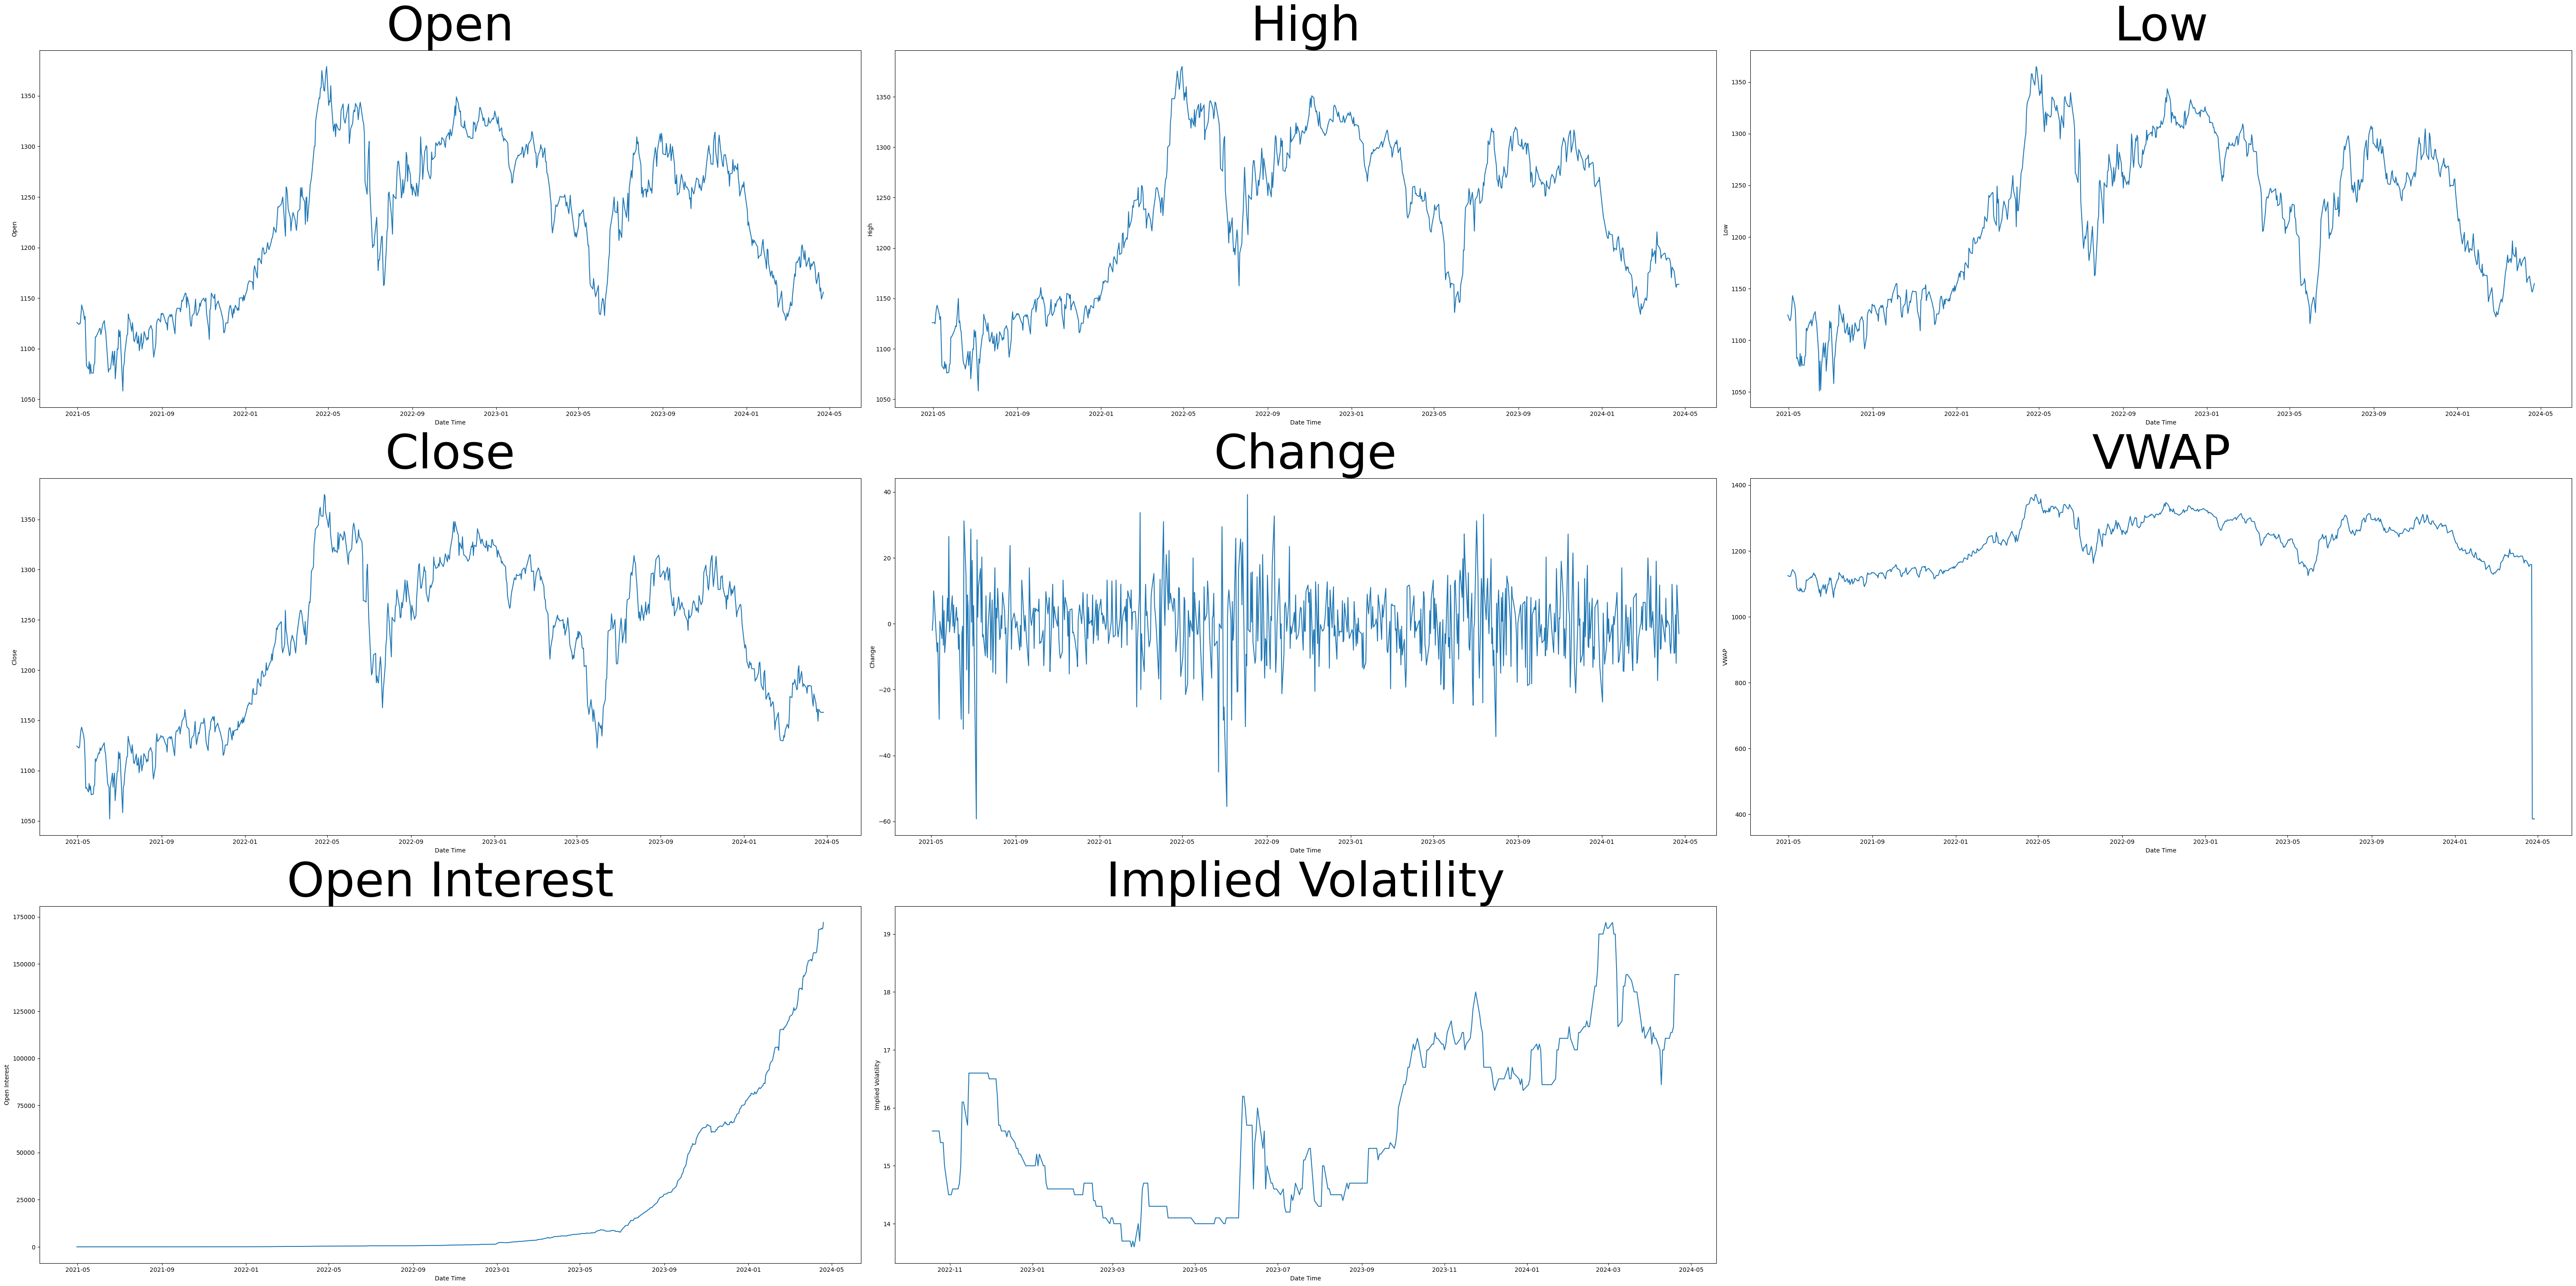

In [51]:
columns_to_plot = df.columns.drop('Date Time')

num_cols = 3
num_rows = -(-len(columns_to_plot) // num_cols)

plt.figure(figsize=(20 * num_cols, 10 * num_rows))
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    plt.plot(df['Date Time'], df[column])
    plt.xlabel('Date Time')
    plt.ylabel(str(column))
    plt.title(column, fontsize=80)

plt.tight_layout()
plt.show()

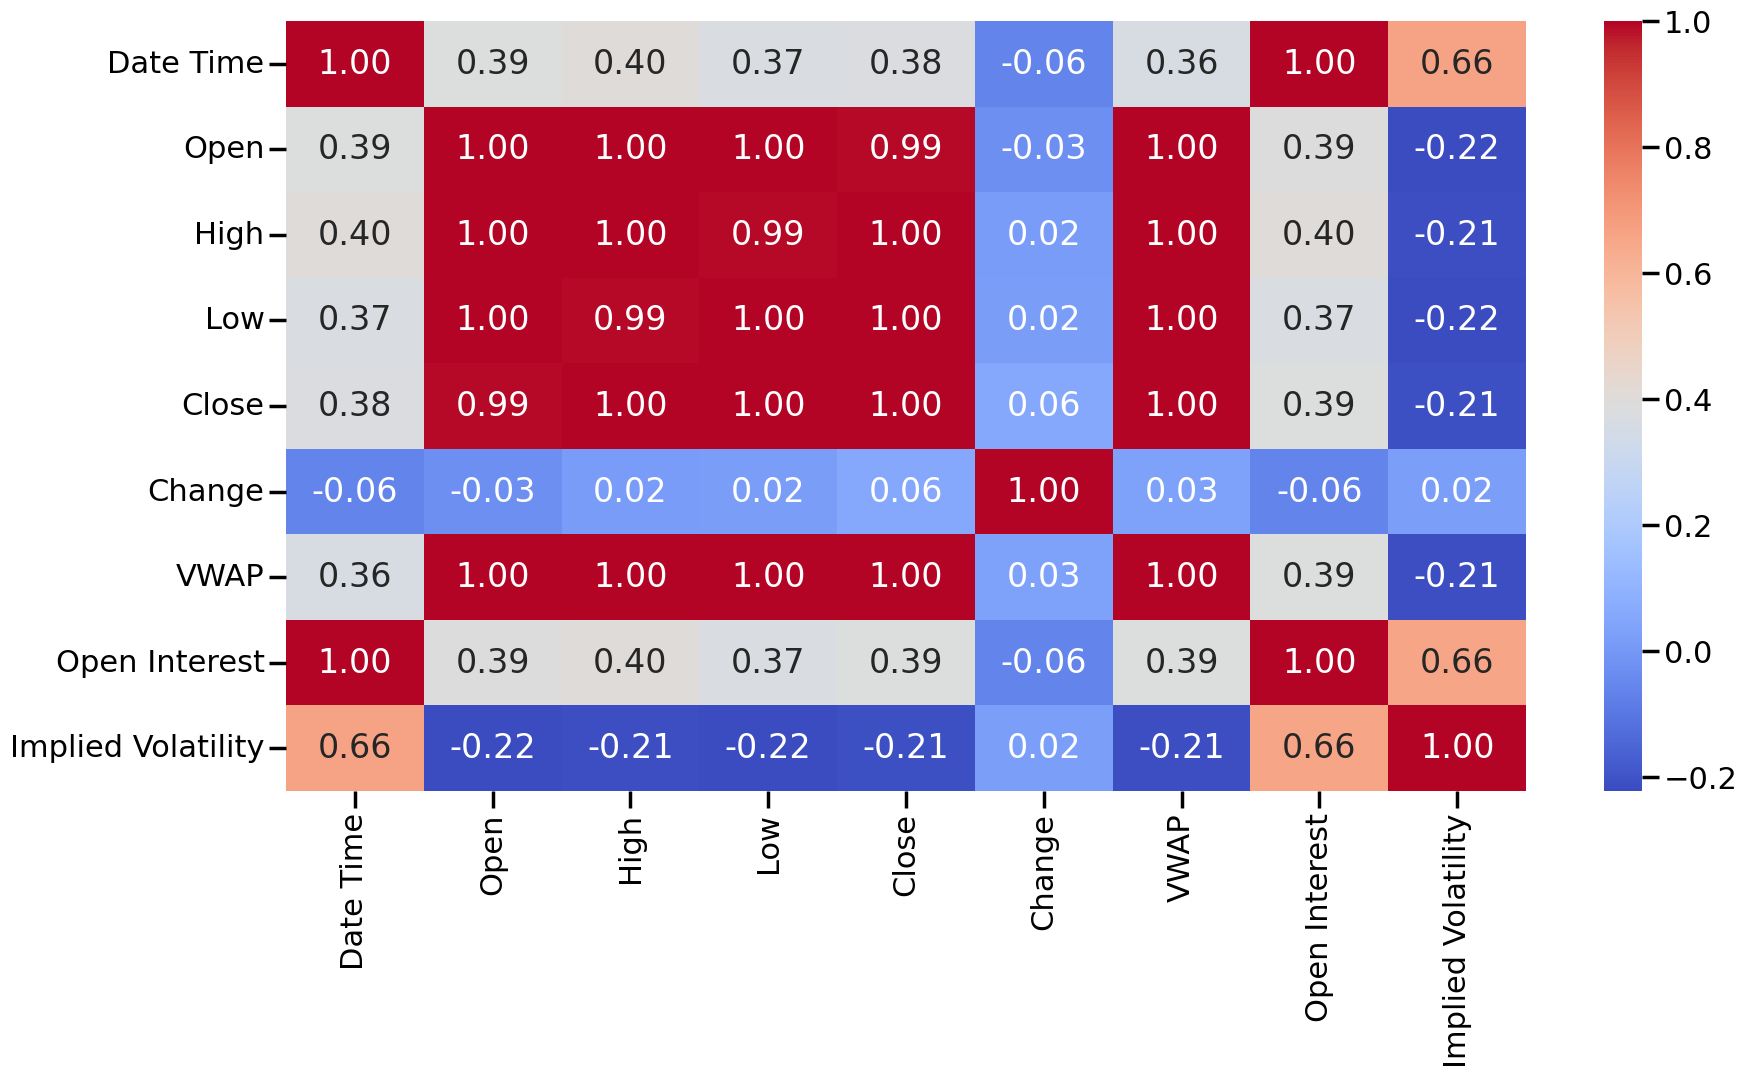

In [58]:
corr = df.corr(method='spearman')

sns.set_context("poster")
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.show()

There are some issues we can see in the data from the above visualization. We can tell that VWAP contains a missing value for the most recent row, showing up on the graph as a spike downward.

If the task is to create predictions for future values for any of these covariates, there are a number of time series forecasting approach that we can take. In general, when deciding on preference bias-variance tradeoff, we can choose from the following methods in order of increasing complexity:

1. **Simple Moving Average**: This is the simplest method that takes into account the weights of the previous values. This method is simple and easy to implement. 
2. **Exponential Smoothing**: This method is similar to the simple moving average, but it gives more weight to the recent values.
3. **Splines**: This method is a more complex method that can take into account the seasonality and trends in the data.
4. **B-Splines with Tensor Decomposition**: This method is a more complex method that can take into account the seasonality and trends in the data.
4. **VARIMA**: This method is a combination of ARIMA and VAR models. It is a more complex method that can take into account the seasonality and trends in the data.
5. **LSTM**: This method is a type of Recurrent Neural Network that can take into account the sequence of the data. It is a more complex method that can take into account the sequence of the data.
6. **LSTM With Attention**: By adding attention mechanism to LSTM, we can give more weight to the important parts of the sequence.

Ultimately, one important thing about this situation to take note of is that we have 8 different covariates that are related in some way. Ideally, we should have some kind of preference bias that takes into account the relationships between these covariates.

On the topic of preference biases, we could also imagine how we could embed broader understanding of the causal structure which generates this data. For example, we could imagine that the data is generated by a physical system with known laws of physics. In reality, this comes from economic data, so we would have to embed some kind of economic theory into our model if we wanted to make predictions that are more accurate.

## Simple Moving Average

As a first step, we can implement a simple moving average model to predict the VWAP. This model is simple and easy to implement. It takes into account the weights of the previous values. The formula for the simple moving average is:

In [59]:
window_size = 3
df['SMA_VWAP'] = df['VWAP'].rolling(window=window_size).mean()
df[['Date Time', 'VWAP', 'SMA_VWAP']].head(10)


,Date Time,VWAP,SMA_VWAP
0,2021-04-30,1125.00,NaN
1,2021-05-03,1122.50,NaN
2,2021-05-04,1122.92,1123.473333
3,2021-05-05,1130.83,1125.416667
4,2021-05-06,1138.25,1130.666667
5,2021-05-07,1143.25,1137.443333
6,2021-05-10,1134.83,1138.776667
7,2021-05-11,1129.00,1135.693333
8,2021-05-12,1118.33,1127.386667
9,2021-05-13,1090.67,1112.666667
